# **종합실습 단변량 분석**

## **1.비즈니스 시나리오**

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.
>
* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


## **2.환경준비**

### **(1) 라이브러리 불러오기**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### **(2) 데이터 로딩 : 카시트 판매량 데이터**

|	변수명	|	설명	|	구분	|
|----|----|----|
|	**Sales** 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	**CompPrice** 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	**Income** 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	**Advertising** 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	**Population** 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	**Price** 	|	 자사 지역별 판매가격	|	feature	|
|	**ShelveLoc** 	|	 진열상태	|	feature	|
|	**Age** 	|	 지역 인구의 평균 연령	|	feature	|
|	**Urban** 	|	 도심 지역 여부(Yes,No)	|	feature	|
|	**US** 	|	 매장이 미국에 있는지 여부(Yes,No)	|	feature	|


In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


## **3.단변량분석 : 숫자형 변수**

* 숫자형변수를 분석하는 함수를 생성합시다.

In [3]:
def eda_1_num(data, var, bins = 30):

    # 기초통계량
    print('<< 기초통계량 >>')
    display(data[[var]].describe().T)
    print('=' * 100)

    # 시각화
    print('<< 그래프 >>')
    plt.figure(figsize = (10,6))

    plt.subplot(2,1,1)
    sns.histplot(data[var], bins = bins, kde = True)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x = data[var])
    plt.grid()
    plt.show()

### **(1) Sales (Target)**

In [4]:
var = 'Sales'

1) 변수의 비즈니스 의미

* 각 지역 판매량(단위 : 1000개)
* Target

2) 기초통계량 및 분포확인

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27


<< 그래프 >>


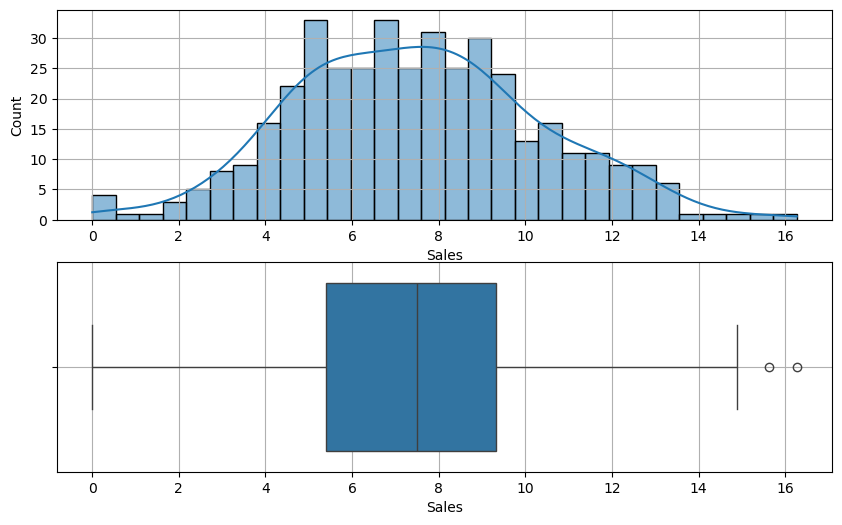

In [5]:
eda_1_num(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 대부분의 판매량이 5천개 ~ 만개 사이

4) 추가 분석해 볼 사항이 있나요?

* 판매량 구간을 0 ~ 4천, 4천 ~ 1만, 1만 이상 으로 구분해서 분석해 볼 필요 있음.

### **(2) CompPrice**

In [6]:
var = 'CompPrice'

1) 변수의 비즈니스 의미

* 경쟁사의 카시트 가격

2) 기초통계량 및 분포확인

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
CompPrice,400.0,124.975,15.334512,77.0,115.0,125.0,135.0,175.0


<< 그래프 >>


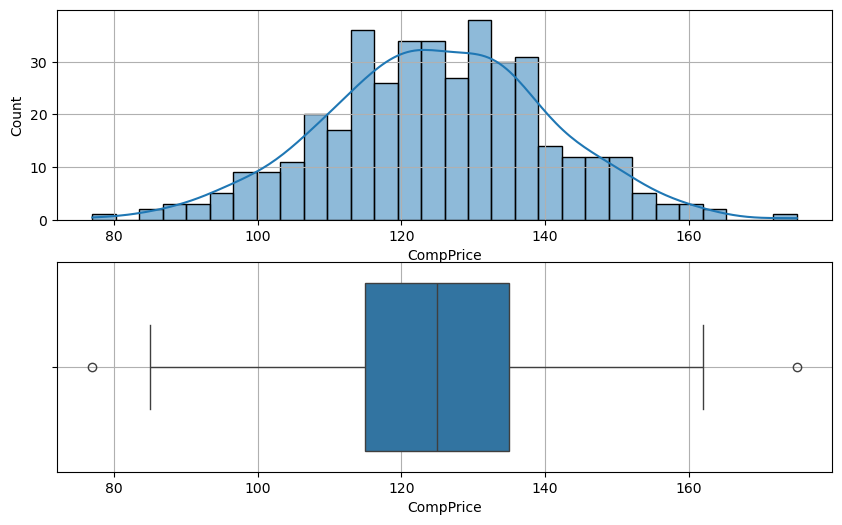

In [7]:
eda_1_num(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 경쟁사의 카시트 가격은 주로 약 115 ~ 135 달러 사이에 분포되어 있다.  
* 정규분포에 가까운 모양  

* 경쟁사에 주력 카시트 모델 가격이 115 ~ 135 달러 사이일 것이다. 

4) 추가 분석해 볼 사항이 있나요?

* 경쟁사의 주력 모델의 가격 파악
* 구간을 85 ~ 115, 115 ~ 135, 135 ~ 160의 구간을 나누어서 분석
* 경쟁사와 평균 가격 차이가 얼마나 나는지 분석

### **(3) Income**

In [8]:
var = 'Income'

1) 변수의 비즈니스 의미

* 매장이 있는 지역의 평균 소득

2) 기초통계량 및 분포확인

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
Income,400.0,68.6575,27.986037,21.0,42.75,69.0,91.0,120.0


<< 그래프 >>


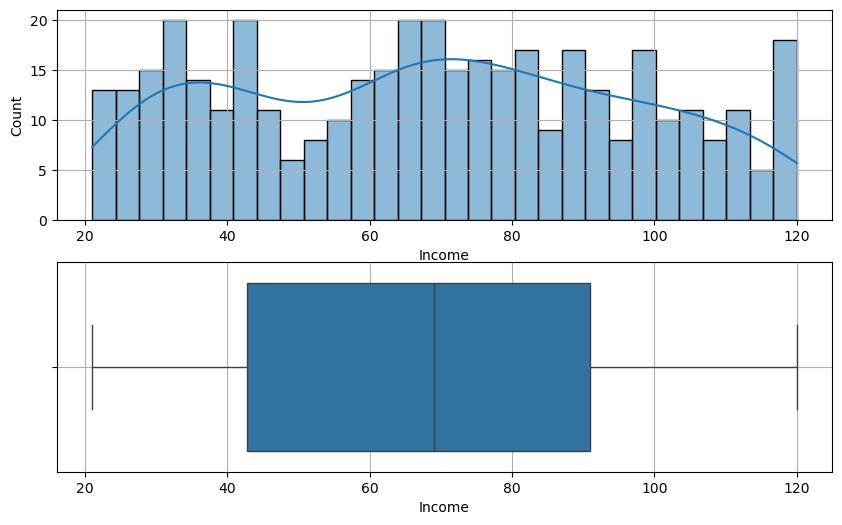

In [9]:
eda_1_num(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [13]:
PATH = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'
df = pd.read_csv(PATH)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southampton


In [15]:
df['Embarked'].value_counts(normalize=True)

Embarked
Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: proportion, dtype: float64

* 매장이 있는 지역의 평균 소득은 40 ~ 90 사이이다.
* 카시트 구매 여력이 있는 고객과 그렇지 않은 고객 두 그룹으로 나눌 수 있을 것이다.

4) 추가 분석해 볼 사항이 있나요?

### **(4) Advertising**

1) 변수의 비즈니스 의미

In [17]:
# 각 지역, 회사의 광고 예산
var = 'Advertising'

2) 기초통계량 및 분포확인

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
Advertising,400.0,6.635,6.650364,0.0,0.0,5.0,12.0,29.0


<< 그래프 >>


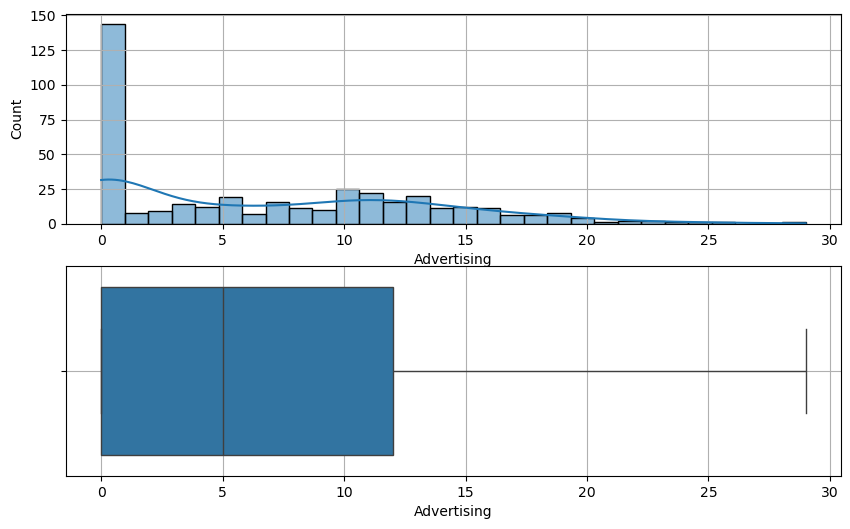

In [18]:
eda_1_num(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [19]:
# 분포가 0이 가장 많은 것으로 보아, 이 회사는 광고를 잘 하지 않는다는 것을 알 수 있다.
# 아마 판매 부진이 광고를 하지 않은 것이 아닐까?

4) 추가 분석해 볼 사항이 있나요?

In [20]:
# 판매 실적과 광고 예산의 상관관계를 분석

### **(5) Population**

1) 변수의 비즈니스 의미

2) 기초통계량 및 분포확인

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

4) 추가 분석해 볼 사항이 있나요?

### **(6) Price**

1) 변수의 비즈니스 의미

2) 기초통계량 및 분포확인

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

4) 추가 분석해 볼 사항이 있나요?

### **(7) Age**

1) 변수의 비즈니스 의미

2) 기초통계량 및 분포확인

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

4) 추가 분석해 볼 사항이 있나요?

## **4.단변량분석 : 범주형 변수**

* 함수 생성

In [21]:
def eda_1_cat(data, var) :
    t1 = data[var].value_counts()
    t2 = data[var].value_counts(normalize = True)
    t3 = pd.concat([t1, t2], axis = 1)
    t3.columns = ['count','ratio']
    display(t3)
    sns.countplot(x = var, data = data)
    plt.show()
    

### **(1) ShelveLoc**

In [22]:
var = 'ShelveLoc'

1) 변수의 비즈니스 의미

* 매장 진열상태

2) 기초통계량(수치화)

,count,ratio
ShelveLoc,,
Medium,219,0.5475
Bad,96,0.2400
Good,85,0.2125


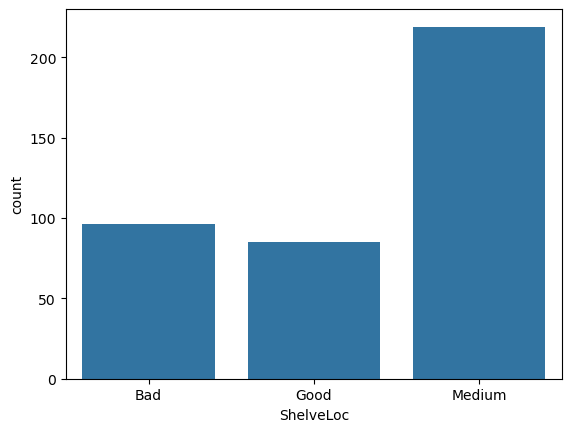

In [23]:
eda_1_cat(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 진열 상태가 중간 정도 가 54%

4) 추가 분석해 볼 사항이 있나요?

* 진열상태에 따른 판매량 차이
* 지역, 인구수와 진열 상태 관계 비교

### **(2) Urban**

In [24]:
var = 'Urban'

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

,count,ratio
Urban,,
Yes,282,0.705
No,118,0.295


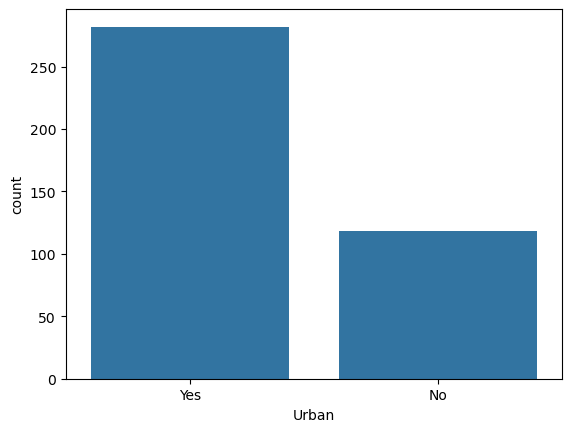

In [25]:
eda_1_cat(data, var)

* 매장의 약 70%는 도시에 있다.

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

4) 추가 분석해 볼 사항이 있나요?

* 도시에 있는 매장이 매출이 더 높은지 파악  
* 경쟁사와 매출 차이가 많이 나는 곳이 어디인지 분석

### **(3) US**

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

4) 추가 분석해 볼 사항이 있나요?